In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_data=pd.read_csv('train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


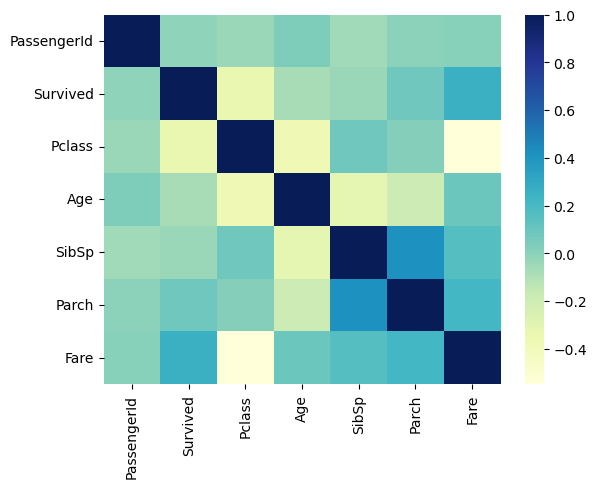

In [5]:
numeric_df = titanic_data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), cmap="YlGnBu")
plt.show()


In [6]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices,test_indices in split.split(titanic_data, titanic_data[['Survived','Pclass','Sex']]):
    strat_train_set=titanic_data.loc[train_indices]
    strat_test_set=titanic_data.loc[test_indices]
    

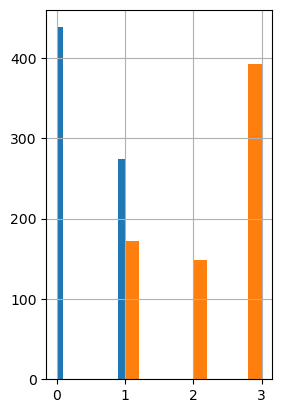

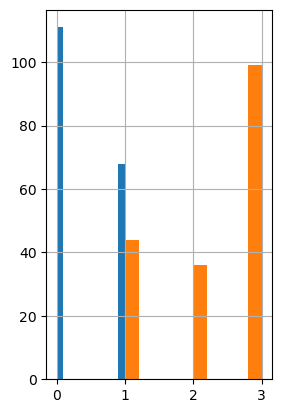

In [8]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.show()
plt.subplot(1,2,1)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 491 to 16
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X):
        imputer=SimpleImputer(strategy="mean")
        X["Age"] =imputer.fit_transform(X[['Age']])
        return X;
        

In [11]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self;
    def transform(self,X):

        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()

        column_names=['C','S','Q','N']
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]

        
        matrix=encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names=['Female','Male']
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        return X

In [12]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(['Embarked','Name','Ticket','Cabin','Sex','N'],axis=1,errors='ignore')

In [13]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('ageimputer',AgeImputer()),
                   ('featureencoder',FeatureEncoder()),
                   ('featuredropper',FeatureDropper())])

In [14]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 491 to 16
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
from sklearn.preprocessing import StandardScaler
X=strat_train_set.drop(['Survived'],axis=1)
y=strat_train_set['Survived']
scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()
param_grid=[
    {'n_estimators': [10,100,200,1000],'max_depth':[None,5,10],'min_samples_split':[2,3,4]}
]
grid_search=GridSearchCV(clf,param_grid, cv=3, scoring='accuracy',return_train_score=True)
grid_search.fit(X_data,y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 1000]}],
             return_train_score=True, scoring='accuracy')

In [18]:
final_clf=grid_search.best_estimator_

In [19]:
final_clf

RandomForestClassifier(min_samples_split=3, n_estimators=1000)

In [20]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [44]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
272,273,1,2,41.0,0,1,19.5000,0.0,0.0,1.0,1.0,0.0
400,401,1,3,39.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
389,390,1,2,17.0,0,0,12.0000,1.0,0.0,0.0,1.0,0.0
327,328,1,2,36.0,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
852,853,0,3,9.0,1,1,15.2458,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,1,1,24.0,3,2,263.0000,0.0,0.0,1.0,1.0,0.0
672,673,0,2,70.0,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
348,349,1,3,3.0,1,1,15.9000,0.0,0.0,1.0,0.0,1.0
63,64,0,3,4.0,3,2,27.9000,0.0,0.0,1.0,0.0,1.0


In [48]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']
scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [52]:
final_clf.score(X_data_test,y_data_test)

0.7988826815642458

In [54]:
final_data=pipeline.fit_transform(titanic_data)

In [58]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [68]:
X_final=final_data.drop(['Survived'],axis=1)
y_final=final_data['Survived']
scaler=StandardScaler()
X_final_data=scaler.fit_transform(X_final)
y_final_data=y_final.to_numpy()

In [72]:
prod_clf=RandomForestClassifier()
param_grid=[
    {'n_estimators': [10,100,200,1000],'max_depth':[None,5,10],'min_samples_split':[2,3,4]}
]
grid_search=GridSearchCV(prod_clf,param_grid, cv=3, scoring='accuracy',return_train_score=True)
grid_search.fit(X_final_data,y_final_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 1000]}],
             return_train_score=True, scoring='accuracy')

In [87]:
prod_final_clf=grid_search.best_estimator_

In [91]:
prod_final_clf.score(X_final_data,y_final_data)

0.8507295173961841

In [99]:
titanic_test_data=pd.read_csv('test.csv')

In [105]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [121]:
X_final_test=final_test_data
X_final_test=X_final_test.ffill()
scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

In [125]:
predictions=prod_final_clf.predict(X_data_final_test)

In [129]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [131]:
final_df=pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv('predictions.csv',index=False)

In [133]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
